# Project 3

In this project, I perform a logistic regression on dummy graduate school admissions data

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import pylab as pl
import numpy as np


/Users/dalvarez83/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
df_raw = pd.read_csv("../assets/admissions.csv")
df = df_raw.dropna() 
print df.head()

   admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0


## Part 1. Frequency Tables

#### 1. Let's create a frequency table of our variables

In [3]:
# frequency table for prestige and whether or not someone was admitted
pd.crosstab(df['admit'],df['prestige'],rownames=['admit'])

prestige,1.0,2.0,3.0,4.0
admit,,,,
0,28,95,93,55
1,33,53,28,12


## Part 2. Return of dummy variables

#### 2.1 Create class or dummy variables for prestige 

In [4]:
prestige_dummies = pd.get_dummies(df['prestige'], prefix='prestige')
print prestige_dummies.head()

   prestige_1.0  prestige_2.0  prestige_3.0  prestige_4.0
0           0.0           0.0           1.0           0.0
1           0.0           0.0           1.0           0.0
2           1.0           0.0           0.0           0.0
3           0.0           0.0           0.0           1.0
4           0.0           0.0           0.0           1.0


#### 2.2 When modeling our class variables, how many do we need? 



Answer: We need n-1 class variables for our model, or 3 total.

## Part 3. Hand calculating odds ratios

Develop your intuition about expected outcomes by hand calculating odds ratios.

In [8]:
cols_to_keep = ['admit', 'gre', 'gpa']
handCalc = df[cols_to_keep].join(prestige_dummies.ix[:, 'prestige':])
print handCalc.head()

   admit    gre   gpa  prestige_1.0  prestige_2.0  prestige_3.0  prestige_4.0
0      0  380.0  3.61           0.0           0.0           1.0           0.0
1      1  660.0  3.67           0.0           0.0           1.0           0.0
2      1  800.0  4.00           1.0           0.0           0.0           0.0
3      1  640.0  3.19           0.0           0.0           0.0           1.0
4      0  520.0  2.93           0.0           0.0           0.0           1.0


In [10]:
#crosstab prestige 1 admission 
# frequency table cutting prestige 1 and whether or not someone was admitted
pd.crosstab(handCalc['admit'],handCalc['prestige_1.0'],rownames=['admit'])

prestige_1.0,0.0,1.0
admit,,
0,243,28
1,93,33


#### 3.1 Use the cross tab above to calculate the odds of being admitted to grad school if you attended a #1 ranked college

In [15]:
oddsadmit_prestige1 = 33/((28.0+33.0)-33.0)
print oddsadmit_prestige1

1.17857142857


#### 3.2 Now calculate the odds of admission if you did not attend a #1 ranked college

In [16]:
oddsadmit_prestige0 = 93/((93.0+243.0)-93.0)
print oddsadmit_prestige0

0.382716049383


#### 3.3 Calculate the odds ratio

In [18]:
odds_ratio = oddsadmit_prestige1/oddsadmit_prestige0
print odds_ratio

3.07949308756


#### 3.4 Write this finding in a sentenance: 

Answer: An applicant attending a #1 ranked college has 3.0794 times the odds of getting admitted into graduate school compared to applicants that did not attend a #1 ranked college. 

#### 3.5 Print the cross tab for prestige_4

In [19]:
#crosstab prestige 4 admission 
# frequency table cutting prestige 4 and whether or not someone was admitted
pd.crosstab(handCalc['admit'],handCalc['prestige_4.0'],rownames=['admit'])

prestige_4.0,0.0,1.0
admit,,
0,216,55
1,114,12


#### 3.6 Calculate the OR 

In [20]:
oddsadmit_prestige4 = 12/((12.0+55.0)-12.0)
print oddsadmit_prestige4
oddsadmit_prestige0 = 114/((114.0+216.0)-114.0)
print oddsadmit_prestige0
odds_ratio = oddsadmit_prestige4/oddsadmit_prestige0
print odds_ratio

0.218181818182
0.527777777778
0.413397129187


#### 3.7 Write this finding in a sentence

Answer: An applicant attending a least prestigious (lowest) ranked college has 0.413 times the odds of getting admitted into graduate school compared to applicants that did not attend a least prestigious (lowest) ranked college. 

Or, said another way, an applicant not attending a least prestigious ranked college has a 2.41898 times the odds of getting admitted into graduate school compared to applicants that did attend a least prestigious ranged college.

## Part 4. Analysis

In [22]:
# create a clean data frame for the regression
cols_to_keep = ['admit', 'gre', 'gpa']
data = df[cols_to_keep].join(prestige_dummies.ix[:, 'prestige_2':])
print data.head()

   admit    gre   gpa  prestige_2.0  prestige_3.0  prestige_4.0
0      0  380.0  3.61           0.0           1.0           0.0
1      1  660.0  3.67           0.0           1.0           0.0
2      1  800.0  4.00           0.0           0.0           0.0
3      1  640.0  3.19           0.0           0.0           1.0
4      0  520.0  2.93           0.0           0.0           1.0


We're going to add a constant term for our Logistic Regression. The statsmodels function we're going to be using requires that intercepts/constants are specified explicitly.

In [28]:
# manually add the intercept
data['intercept'] = 1.0

#### 4.1 Set the covariates to a variable called train_cols

In [29]:
train_cols = data.columns[1:]
print train_cols

Index([u'gre', u'gpa', u'prestige_2.0', u'prestige_3.0', u'prestige_4.0',
       u'intercept'],
      dtype='object')


#### 4.2 Fit the model

In [30]:
logit = sm.Logit(data['admit'], data[train_cols])

#### 4.3 Print the summary results

In [34]:
result = logit.fit()
print result.summary()

Optimization terminated successfully.
         Current function value: 0.573854
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                  admit   No. Observations:                  397
Model:                          Logit   Df Residuals:                      391
Method:                           MLE   Df Model:                            5
Date:                Tue, 29 Nov 2016   Pseudo R-squ.:                 0.08166
Time:                        13:10:58   Log-Likelihood:                -227.82
converged:                       True   LL-Null:                       -248.08
                                        LLR p-value:                 1.176e-07
                   coef    std err          z      P>|z|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
gre              0.0022      0.001      2.028      0.043      7.44e-05     0.004
gpa              0.7793

#### 4.4 Calculate the odds ratios of the coeffiencents and their 95% CI intervals

hint 1: np.exp(X)

hint 2: conf['OR'] = params
        
           conf.columns = ['2.5%', '97.5%', 'OR']

In [35]:
print np.exp(result.params)

gre             1.002221
gpa             2.180027
prestige_2.0    0.506548
prestige_3.0    0.262192
prestige_4.0    0.211525
intercept       0.020716
dtype: float64


In [41]:
params = result.params
conf = result.conf_int()
conf['OR'] = params
conf.columns = ['2.5%','97.5%','OR']
print np.exp(conf)

                  2.5%     97.5%        OR
gre           1.000074  1.004372  1.002221
gpa           1.136120  4.183113  2.180027
prestige_2.0  0.272168  0.942767  0.506548
prestige_3.0  0.133377  0.515419  0.262192
prestige_4.0  0.093329  0.479411  0.211525
intercept     0.002207  0.194440  0.020716


#### 4.5 Interpret the OR of Prestige_2

Answer: The odds of being admitted decreases by about 50% if the applicant's school prestige is 2 compared to an applicant who's school prestige is 1, controlling for GRE scores and GPA.  

#### 4.6 Interpret the OR of GPA

Answer: The odds of being admitted increases by 218% for every one unit increase in GPA, controlling for GRE scores and school prestige.

## Part 5: Predicted probablities


As a way of evaluating our classifier, we're going to recreate the dataset with every logical combination of input values. This will allow us to see how the predicted probability of admission increases/decreases across different variables. First we're going to generate the combinations using a helper function called cartesian (above).

We're going to use np.linspace to create a range of values for "gre" and "gpa". This creates a range of linearly spaced values from a specified min and maximum value--in our case just the min/max observed values.

In [42]:
def cartesian(arrays, out=None):
    """
    Generate a cartesian product of input arrays.
    Parameters
    ----------
    arrays : list of array-like
        1-D arrays to form the cartesian product of.
    out : ndarray
        Array to place the cartesian product in.
    Returns
    -------
    out : ndarray
        2-D array of shape (M, len(arrays)) containing cartesian products
        formed of input arrays.
    Examples
    --------
    >>> cartesian(([1, 2, 3], [4, 5], [6, 7]))
    array([[1, 4, 6],
           [1, 4, 7],
           [1, 5, 6],
           [1, 5, 7],
           [2, 4, 6],
           [2, 4, 7],
           [2, 5, 6],
           [2, 5, 7],
           [3, 4, 6],
           [3, 4, 7],
           [3, 5, 6],
           [3, 5, 7]])
    """

    arrays = [np.asarray(x) for x in arrays]
    dtype = arrays[0].dtype

    n = np.prod([x.size for x in arrays])
    if out is None:
        out = np.zeros([n, len(arrays)], dtype=dtype)

    m = n / arrays[0].size
    out[:,0] = np.repeat(arrays[0], m)
    if arrays[1:]:
        cartesian(arrays[1:], out=out[0:m,1:])
        for j in xrange(1, arrays[0].size):
            out[j*m:(j+1)*m,1:] = out[0:m,1:]
    return out

In [52]:
# instead of generating all possible values of GRE and GPA, we're going
# to use an evenly spaced range of 10 values from the min to the max 
gres = np.linspace(data['gre'].min(), data['gre'].max(), 10)
print gres
# array([ 220.        ,  284.44444444,  348.88888889,  413.33333333,
#         477.77777778,  542.22222222,  606.66666667,  671.11111111,
#         735.55555556,  800.        ])
gpas = np.linspace(data['gpa'].min(), data['gpa'].max(), 10)
print gpas
# array([ 2.26      ,  2.45333333,  2.64666667,  2.84      ,  3.03333333,
#         3.22666667,  3.42      ,  3.61333333,  3.80666667,  4.        ])


# enumerate all possibilities
combos = pd.DataFrame(cartesian([gres, gpas, [1, 2, 3, 4], [1.]]))
combos.columns = ['gre', 'gpa', 'prestige', 'intercept']

[ 220.          284.44444444  348.88888889  413.33333333  477.77777778
  542.22222222  606.66666667  671.11111111  735.55555556  800.        ]
[ 2.26        2.45333333  2.64666667  2.84        3.03333333  3.22666667
  3.42        3.61333333  3.80666667  4.        ]


#### 5.1 Recreate the dummy variables

In [53]:
# recreate the dummy variables
prestige_dummies = pd.get_dummies(df['prestige'], prefix='prestige')
print prestige_dummies.columns

# keep only what we need for making predictions
cols_to_keep = ['gre', 'gpa', 'prestige', 'intercept']
combos = combos[cols_to_keep].join(prestige_dummies.ix[:, 'prestige_2':])
print combos.columns

Index([u'prestige_1.0', u'prestige_2.0', u'prestige_3.0', u'prestige_4.0'], dtype='object')
Index([u'gre', u'gpa', u'prestige', u'intercept', u'prestige_2.0',
       u'prestige_3.0', u'prestige_4.0'],
      dtype='object')


#### 5.2 Make predictions on the enumerated dataset

In [58]:
combos['admit_pred'] = result.predict(combos[train_cols])
print combos.tail()


       gre       gpa  prestige  intercept  prestige_2.0  prestige_3.0  \
395  800.0  3.806667       4.0        1.0           1.0           0.0   
396  800.0  4.000000       1.0        1.0           0.0           1.0   
397  800.0  4.000000       2.0        1.0           1.0           0.0   
398  800.0  4.000000       3.0        1.0           1.0           0.0   
399  800.0  4.000000       4.0        1.0           0.0           1.0   

     prestige_4.0  admit_pred  
395           0.0    0.545972  
396           0.0    0.419833  
397           0.0    0.582995  
398           0.0    0.582995  
399           0.0    0.419833  


#### 5.3 Interpret findings for the last 4 observations

Answer: Based on the training set of linearly spaced values, the last 4 observations have an odds of admission of between 41.9% to 58.3%.    

## Bonus

Plot the probability of being admitted into graduate school, stratified by GPA and GRE score.

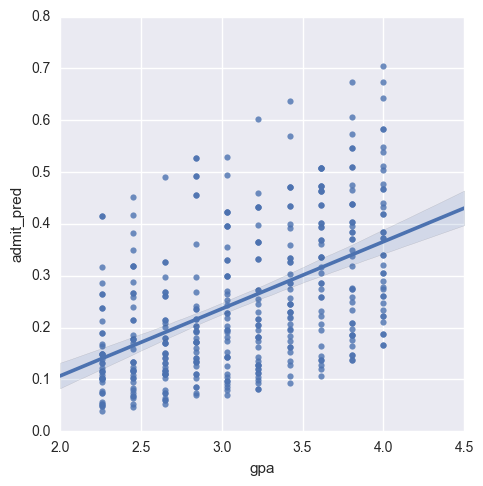

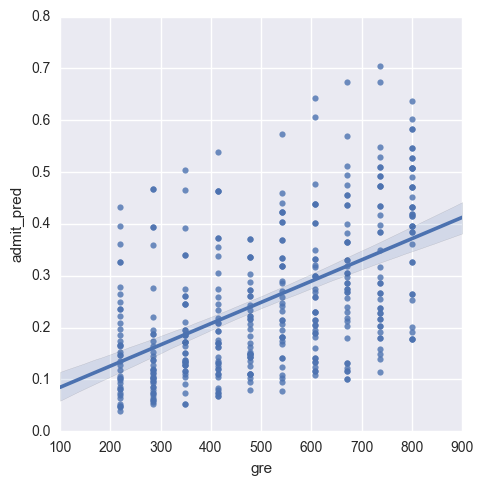

In [67]:
import seaborn as sns
sns.lmplot('gpa', 'admit_pred', combos) 
sns.lmplot('gre', 'admit_pred', combos)


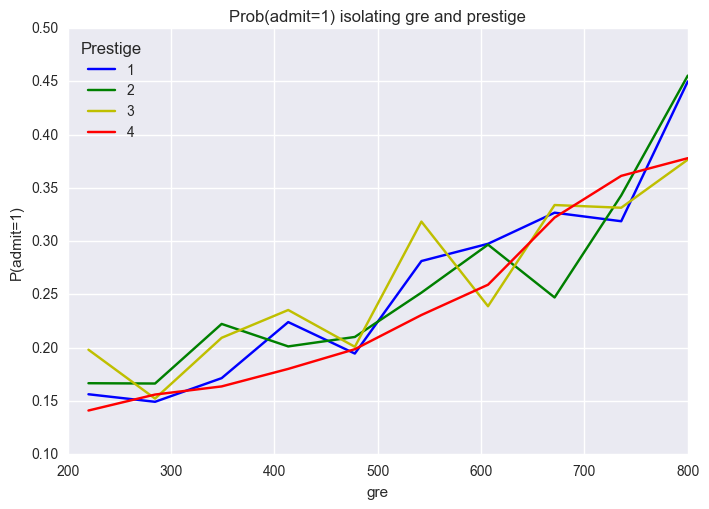

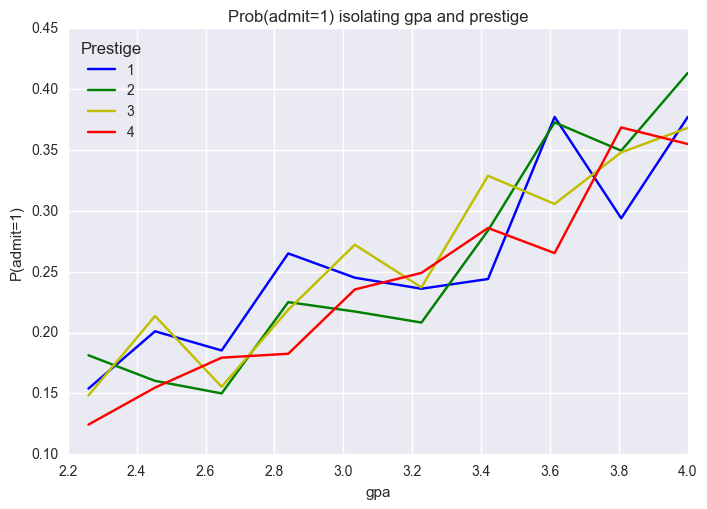

In [70]:
def isolate_and_plot(variable):
    #isolate gre and prestige of school ranking
    grouped = pd.pivot_table(combos, values=['admit_pred'], index=[variable,'prestige'],aggfunc=np.mean)
    #make a plot
    colors = 'rbgyrbgy'
    for col in combos.prestige.unique():
        plt_data = grouped.ix[grouped.index.get_level_values(1)==col]
        pl.plot(plt_data.index.get_level_values(0), plt_data['admit_pred'], color=colors[int(col)])
    pl.xlabel(variable)
    pl.ylabel("P(admit=1)")
    pl.legend(['1','2','3','4'],loc='upper left', title='Prestige')
    pl.title("Prob(admit=1) isolating " + variable + " and prestige")
    pl.show()

isolate_and_plot('gre')
isolate_and_plot('gpa')